In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import scipy
import time

from sklearn.model_selection import GridSearchCV

In [186]:
#import train and test data
train_data = pd.read_csv("C:/Users/Sanja/Desktop/Faks/Data Science/Machine Learning/Exercise 1/184702-tu-ml-ss-19-congressional-voting/CongressionalVotingID.shuf.train.csv")
test_data = pd.read_csv("C:/Users/Sanja/Desktop/Faks/Data Science/Machine Learning/Exercise 1/184702-tu-ml-ss-19-congressional-voting/CongressionalVotingID.shuf.test.csv")

In [187]:
#Change dataset inputs
train_data = train_data.replace('y',1)
train_data = train_data.replace('n',0)
train_data = train_data.replace('unknown', np.nan)
train_data = train_data.replace('republican',0)
train_data = train_data.replace('democrat',1)

test_data = test_data.replace('y',1)
test_data = test_data.replace('n',0)
test_data = test_data.replace('unknown', np.nan)

In [225]:
train_data.describe()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,218.000000,218.000000,213.000000,188.000000,212.000000,213.000000,208.000000,210.000000,207.000000,211.000000,206.000000,214.000000,208.000000,198.000000,208.000000,210.000000,204.000000,167.000000
mean,206.811927,0.628440,0.469484,0.542553,0.622642,0.399061,0.514423,0.623810,0.560386,0.568720,0.495146,0.518692,0.379808,0.429293,0.528846,0.585714,0.421569,0.814371
std,124.240685,0.484334,0.500244,0.499516,0.485873,0.490859,0.500998,0.485586,0.497543,0.496433,0.501194,0.500822,0.486510,0.496230,0.500371,0.493775,0.495025,0.389976
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,205.500000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,307.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,435.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
#Checking missing values
train_data.isnull().values.any()

True

In [219]:
test_data.describe()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,217.000000,210.000000,199.000000,212.000000,211.000000,212.000000,214.000000,214.000000,209.000000,207.000000,214.000000,206.000000,206.000000,202.000000,208.000000,203.000000,164.000000
mean,229.239631,0.414286,0.467337,0.570755,0.436019,0.495283,0.658879,0.574766,0.583732,0.507246,0.490654,0.344660,0.417476,0.490099,0.600962,0.433498,0.810976
std,126.474846,0.493775,0.500190,0.496140,0.497069,0.501161,0.475198,0.495538,0.494123,0.501159,0.501085,0.476415,0.494344,0.501144,0.490882,0.496783,0.392727
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,229.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,337.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,434.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Dataset Description

The Dataset *train data* has **218  samples** and **17 attributes**  (1 of them is *ID*).

These are the attributes: 
* handicapped-infants	
* water-project-cost-sharing
* adoption-of-the-budget-resolution
* physician-fee-freeze
* el-salvador-aid
* religious-groups-in-schools	
* anti-satellite-test-ban
* aid-to-nicaraguan-contras
* mx-missile
* immigration						
* synfuels-crporation-cutback
* education-spending
* superfund-right-to-sue
* crime
* duty-free-exports
* export-administration-act-south-africa

All attributes are **nominal** and have only **two classes** - Yes/No. There are missing values. 


The **output variable** is also nominal and binary- the values are **democrat/republican**.

Dataset *test_data* contains **217 samples**.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001910F41BC88>,
      dtype=object)

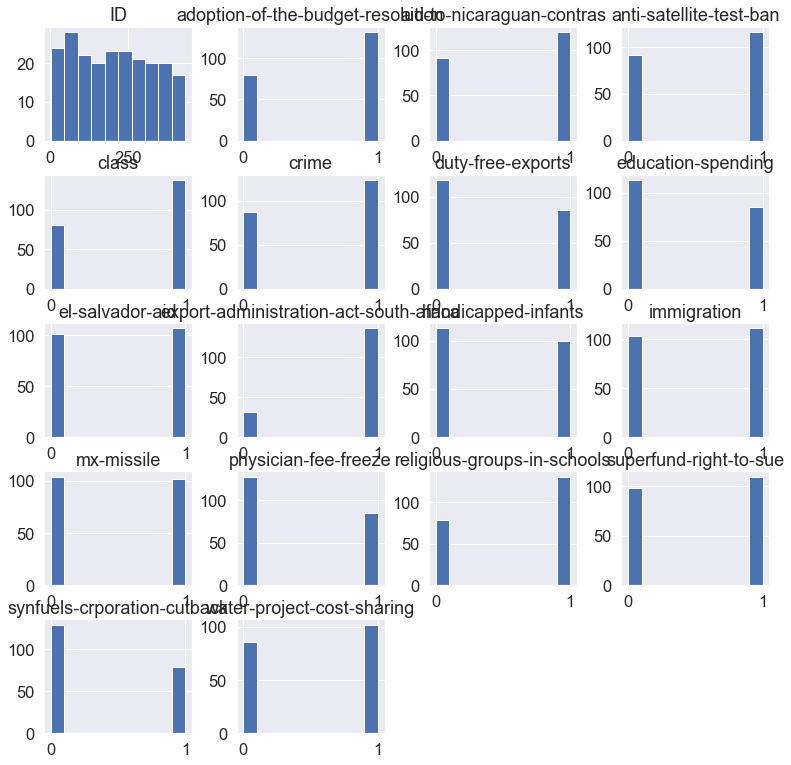

In [220]:
#plot distribution
train_data.hist(figsize=(13,13))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001910FB3D0F0>,
      dtype=object)

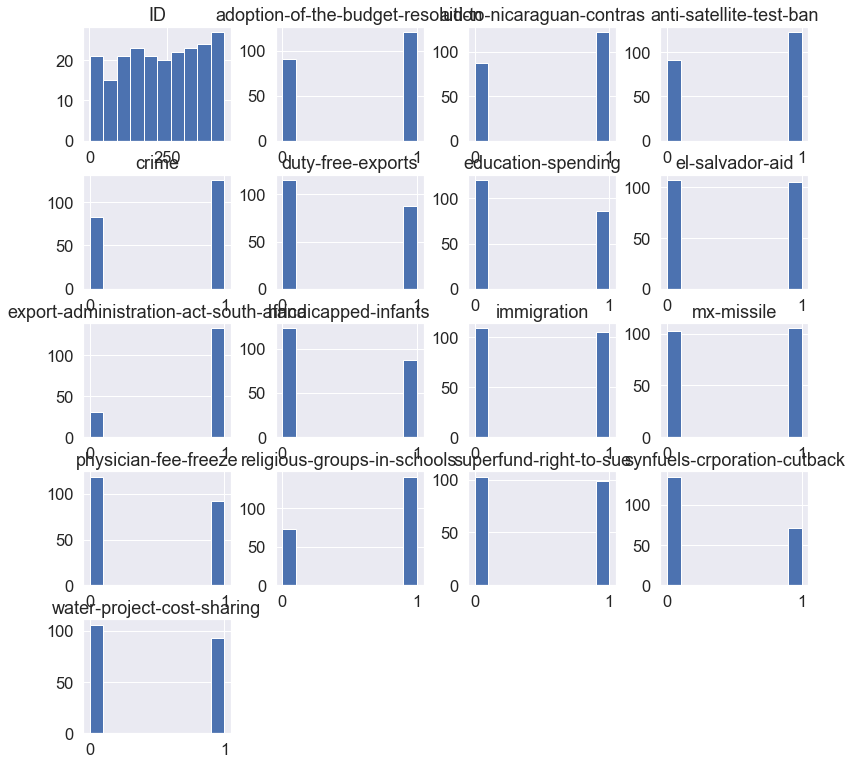

In [221]:
test_data.hist(figsize=(13,13))

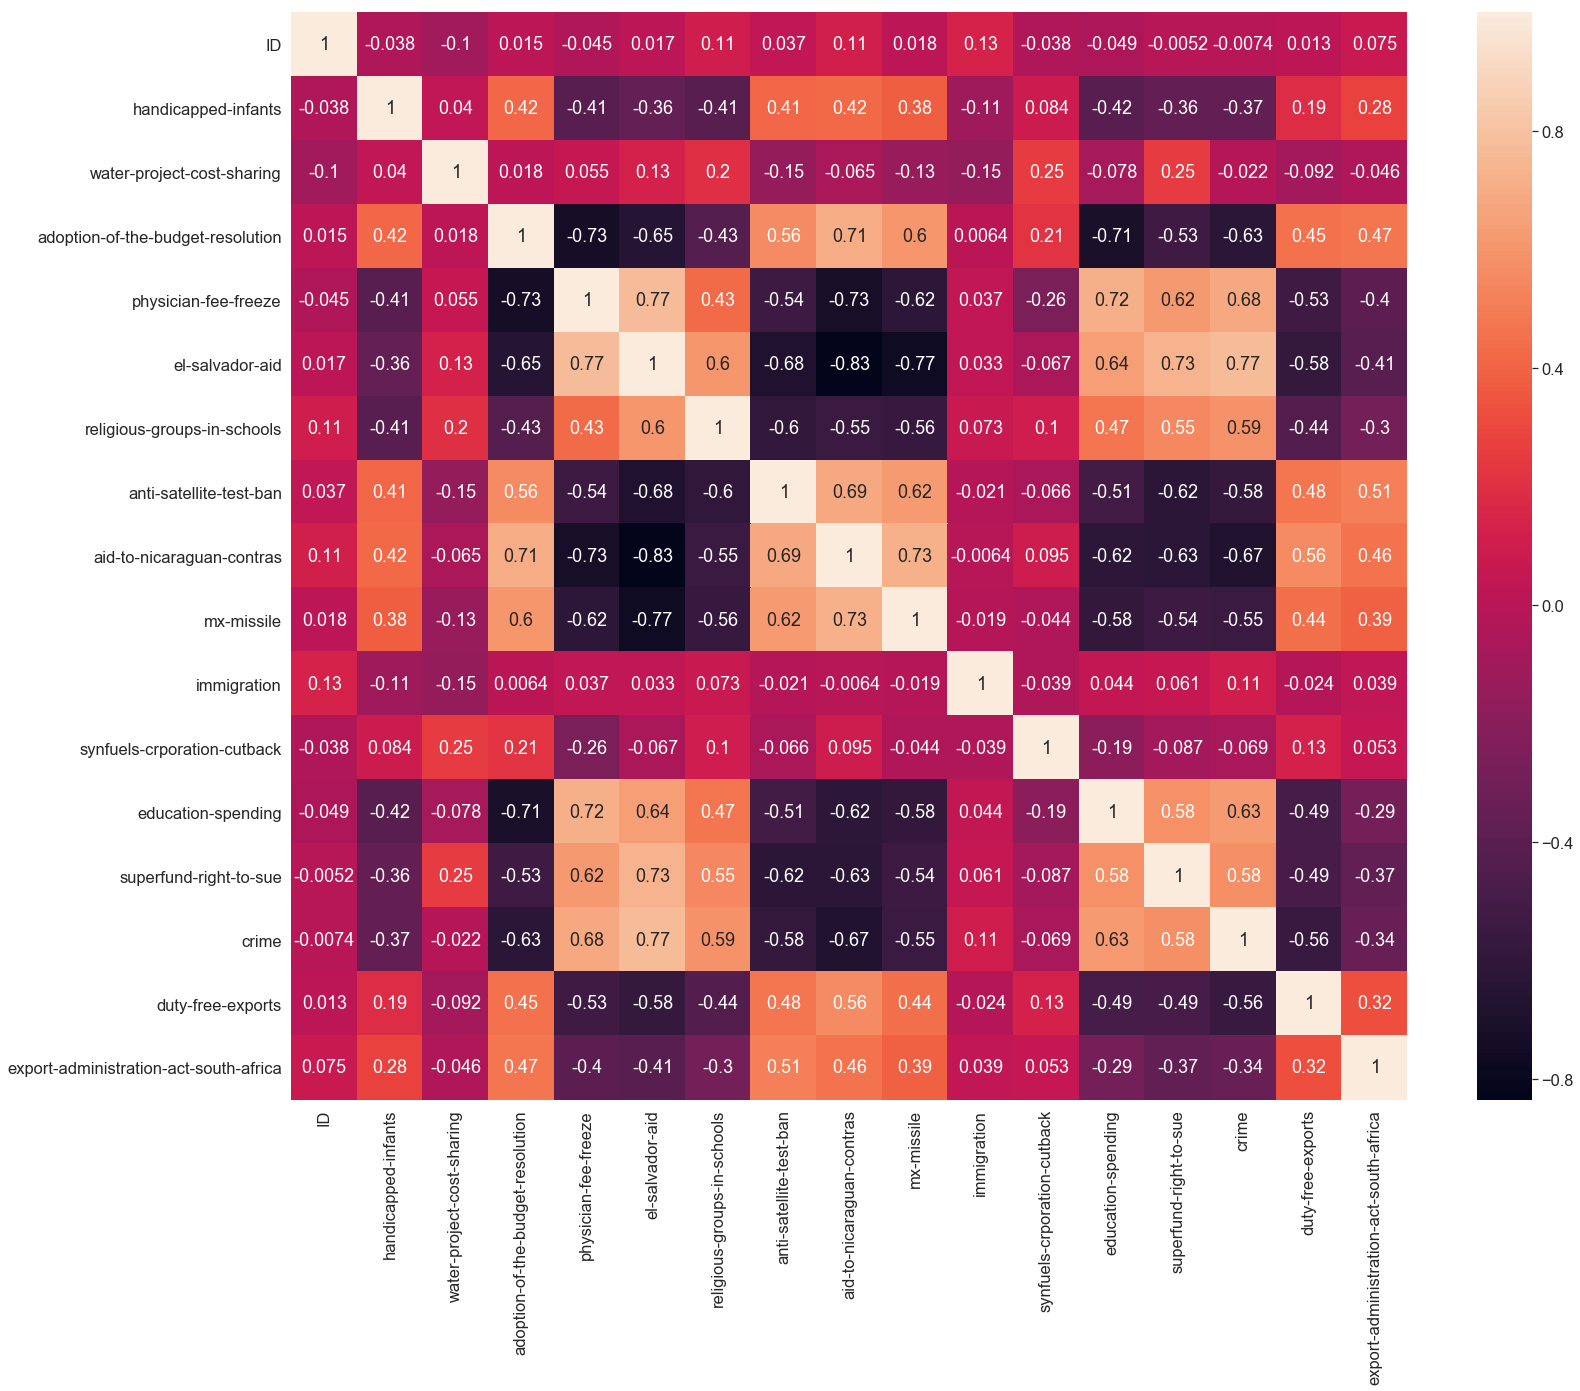

In [96]:
plt.figure(figsize=(25,20))
sns.set(font_scale=1.5)
sns.heatmap(train_data.corr(),annot=True);

From histograms of *train_data* we can see how attributes are distributed - as they are binary they have Bernoulli distribution with different means. The distribution of the *test_data* doesn't seem to be significantly different. 

From the correlation plot, we can see that there are some variables that seem to be highly positively ( ) and negatively correlated. 

In [188]:
#drop the rows with too many missing values 
na_count = train_data.isnull().sum(axis=1)

drop_rows1 = na_count.where(lambda x : x > 15).dropna().index
print(drop_rows1)
train_data1 = train_data.drop(drop_rows1)

drop_rows2 = na_count.where(lambda x : x > 14).dropna().index
print(drop_rows2)
train_data2 = train_data.drop(drop_rows2)

drop_rows3 = na_count.where(lambda x : x > 10).dropna().index
print(drop_rows3)
train_data3 = train_data.drop(drop_rows3)

Int64Index([20], dtype='int64')
Int64Index([20, 63], dtype='int64')
Int64Index([20, 63, 67], dtype='int64')


In [189]:
#separate predictors and target variables

X_1 = train_data1.iloc[:, 2:].values
y_1 = train_data1.iloc[:, 1].values

X_2 = train_data2.iloc[:, 2:].values
y_2 = train_data2.iloc[:, 1].values

X_3 = train_data3.iloc[:, 2:].values
y_3 = train_data3.iloc[:, 1].values

X_test = test_data.iloc[:, 1:].values

In [190]:
#replace missing values with the most frequent ones

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp.fit(X_1)
X_1 = imp.transform(X_1)

imp.fit(X_2)
X_2 = imp.transform(X_2)

imp.fit(X_3)
X_3 = imp.transform(X_3)

imp.fit(X_test)
X_test = imp.transform(X_test)

In [191]:
#K-Folds cross-validator

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state = 28)

In [192]:
#scale data 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_1 = sc.fit_transform(X_1)
X_2 = sc.fit_transform(X_2)
X_3 = sc.fit_transform(X_3)

X_test = sc.fit_transform(X_test)

# Naive Bayes

In [193]:
#NAIVE BAYES

from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_val_score

model_gnb = GaussianNB()

for score in ["accuracy", "precision", "recall"]:
    print("Gaussian Naive Bayes", score,":", cross_val_score(model_gnb, X_1, y_1, scoring=score, cv = skf.split(X_1,y_1)).mean()*100)
    

Gaussian Naive Bayes accuracy : 95.40169133192389
Gaussian Naive Bayes precision : 97.03500203500204
Gaussian Naive Bayes recall : 95.63492063492063


In [194]:
for score in ["accuracy", "precision", "recall"]:
    print("Gaussian Naive Bayes", score,":", cross_val_score(model_gnb, X_2, y_2, scoring=score, cv = skf.split(X_2,y_2)).mean()*100)
    

Gaussian Naive Bayes accuracy : 95.36997885835096
Gaussian Naive Bayes precision : 97.00651200651201
Gaussian Naive Bayes recall : 95.5820105820106


In [201]:
for score in ["accuracy", "precision", "recall"]:
    print("Gaussian Naive Bayes", score,":", cross_val_score(model_gnb, X_3, y_3, scoring=score, cv = skf.split(X_3,y_3)).mean()*100)

Gaussian Naive Bayes accuracy : 95.83509513742072
Gaussian Naive Bayes precision : 97.77574277574278
Gaussian Naive Bayes recall : 95.5820105820106


In [205]:
#fit, predict, save data
start = time.time()

model_gnb.fit(X_1,y_1)

end= time.time()
print('Navie Bayes takes ',end-start, 'ms to fit the data')

gnb_prediction = model_gnb.predict(X_test)
#print(gnb_prediction)

gnb_prediction = np.where(gnb_prediction==0, 'republican', gnb_prediction)
gnb_prediction = np.where(gnb_prediction=='1', 'democrat', gnb_prediction)
data = {"ID":test_data.iloc[:, 0], "class": gnb_prediction}
result = pd.DataFrame(data)

result.to_csv("C:/Users/Sanja/Desktop/Faks/Data Science/Machine Learning/Exercise 1/184702-tu-ml-ss-19-congressional-voting/CongressionalVotingID.shuf.naive_bayes.csv",index=False)

Navie Bayes takes  0.0019969940185546875 ms to fit the data


# KNN

In [206]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

model_knn1 = KNeighborsClassifier()

for score in ["accuracy", "precision", "recall"]:
    print("KNN", score,":", cross_val_score(model_knn1, X_1, y_1, scoring=score, cv = skf.split(X_1,y_1)).mean()*100)

KNN accuracy : 92.16701902748413
KNN precision : 97.0822281167109
KNN recall : 90.47619047619048


In [207]:
for score in ["accuracy", "precision", "recall"]:
    print("KNN", score,":", cross_val_score(model_knn1, X_2, y_2, scoring=score, cv = skf.split(X_2,y_2)).mean()*100)

KNN accuracy : 92.1353065539112
KNN precision : 97.03296703296704
KNN recall : 90.44973544973544


In [208]:
for score in ["accuracy", "precision", "recall"]:
    print("KNN", score,":", cross_val_score(model_knn1, X_3, y_3, scoring=score, cv = skf.split(X_3,y_3)).mean()*100)

KNN accuracy : 92.56720024161883
KNN precision : 97.72079772079772
KNN recall : 90.44973544973544


In [134]:
#find the best parameters for X_1

parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14], 'weights':('uniform','distance'), 
              'algorithm':('auto','ball_tree','kd_tree','brute'), 'p':[1,2], 'leaf_size':[1,2,3,4,5,6,7,8,9,10,20,30,40]}

clf = GridSearchCV(model_knn1, parameters, cv=skf.split(X_1,y_1))
clf.fit(X_1, y_1)
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

In [137]:
#best model for X_1 

model_knn_1 = KNeighborsClassifier(algorithm='auto', leaf_size= 1, n_neighbors= 2, p= 1, weights= 'distance')

for score in ["accuracy", "precision", "recall"]:
    print("KNN", score,":", cross_val_score(model_knn_1, X_1, y_1, scoring=score, cv = skf.split(X_1,y_1)).mean()*100)


KNN accuracy : 95.39112050739958
KNN precision : 97.08994708994709
KNN recall : 95.6084656084656


In [138]:
#find the best parameters for X_2

parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14], 'weights':('uniform','distance'), 
              'algorithm':('auto','ball_tree','kd_tree','brute'), 'p':[1,2], 'leaf_size':[1,2,3,4,5,6,7,8,9,10,20,30,40]}

clf = GridSearchCV(model_knn1, parameters, cv=skf.split(X_2,y_2))
clf.fit(X_2, y_2)
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

In [140]:
#best model for X_2 

model_knn_2 = KNeighborsClassifier(algorithm='auto', leaf_size= 1, n_neighbors= 2, p= 1, weights= 'distance')

for score in ["accuracy", "precision", "recall"]:
    print("KNN", score,":", cross_val_score(model_knn_2, X_2, y_2, scoring=score, cv = skf.split(X_2,y_2)).mean()*100)

KNN accuracy : 95.36997885835096
KNN precision : 97.06349206349205
KNN recall : 95.58201058201057


In [133]:
#find the best parameters for X_3

parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14], 'weights':('uniform','distance'), 
              'algorithm':('auto','ball_tree','kd_tree','brute'), 'p':[1,2], 'leaf_size':[1,2,3,4,5,6,7,8,9,10,20,30,40]}

clf = GridSearchCV(model_knn1, parameters, cv=skf.split(X_3,y_3))
clf.fit(X_3, y_3)
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 2,
 'p': 1,
 'weights': 'distance'}

In [136]:
#best model for X_3 according to the parameters

model_knn_3 = KNeighborsClassifier(algorithm='auto', leaf_size= 1, n_neighbors= 2, p= 1, weights= 'distance')

for score in ["accuracy", "precision", "recall"]:
    print("KNN", score,":", cross_val_score(model_knn_3, X_3, y_3, scoring=score, cv = skf.split(X_3,y_3)).mean()*100)


KNN accuracy : 94.87163998791905
KNN precision : 96.29426129426129
KNN recall : 95.58201058201057


In [141]:
parameters = {'weights':('uniform','distance'), 
              'algorithm':('auto','ball_tree','kd_tree','brute'), 'p':[1,2], 'leaf_size':[1,2,3,4,5,6,7,8,9,10]}

clf = GridSearchCV(model_knn1, parameters, cv=skf.split(X_1,y_1))
clf.fit(X_1, y_1)
clf.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'p': 1, 'weights': 'uniform'}

In [142]:
model_knn2 = KNeighborsClassifier(algorithm='auto', leaf_size= 1, p= 1, weights= 'uniform')

for score in ["accuracy", "precision", "recall"]:
    print("KNN", score,":", cross_val_score(model_knn2, X_1, y_1, scoring=score, cv = skf.split(X_1,y_1)).mean()*100)


KNN accuracy : 93.09725158562368
KNN precision : 97.11071814520089
KNN recall : 91.95767195767196


In [143]:
model_knn3 = KNeighborsClassifier(n_neighbors = 8,algorithm='kd_tree', leaf_size= 25, p= 1, weights= 'uniform')

for score in ["accuracy", "precision", "recall"]:
    print("KNN", score,":", cross_val_score(model_knn3, X_1, y_1, scoring=score, cv = skf.split(X_1,y_1)).mean()*100)

KNN accuracy : 91.25792811839324
KNN precision : 97.77142857142857
KNN recall : 88.30687830687832


In [210]:
#fit, predict, save data
start = time.time()
model_knn_1.fit(X_1,y_1)
end = time.time()
print('KNN takes' , end-start, 'ms to fit the data.')

knn_best_prediction = model_knn_1.predict(X_test)
#print(knn_best_prediction)
knn_prediction = np.where(knn_prediction==0, 'republican', knn_prediction)
knn_prediction = np.where(knn_prediction=='1', 'democrat', knn_prediction)

data = {"ID":test_data.iloc[:, 0], "class": knn_prediction}
result = pd.DataFrame(data)

result.to_csv("C:/Users/Sanja/Desktop/Faks/Data Science/Machine Learning/Exercise 1/184702-tu-ml-ss-19-congressional-voting/CongressionalVotingID.shuf.knn.csv",index=False)

KNN takes 0.001016855239868164 ms to fit the data.
[1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1
 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1]


# Random Forest

In [211]:
#random forests 

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

for score in ["accuracy", "precision", "recall"]:
    print("Random Forests", score,":", cross_val_score(model_rf, X_1, y_1, scoring=score, cv = skf.split(X_1,y_1)).mean()*100)

Random Forests accuracy : 94.9260042283298
Random Forests precision : 97.16180371352785
Random Forests recall : 95.60846560846562


In [212]:
for score in ["accuracy", "precision", "recall"]:
    print("Random Forests", score,":", cross_val_score(model_rf, X_2, y_2, scoring=score, cv = skf.split(X_2,y_2)).mean()*100)

Random Forests accuracy : 95.38054968287526
Random Forests precision : 97.85714285714285
Random Forests recall : 95.5820105820106


In [213]:
for score in ["accuracy", "precision", "recall"]:
    print("Random Forests", score,":", cross_val_score(model_rf, X_3, y_3, scoring=score, cv = skf.split(X_3,y_3)).mean()*100)

Random Forests accuracy : 94.83892076915332
Random Forests precision : 98.54497354497354
Random Forests recall : 96.32275132275133


In [150]:
parameters = {'n_estimators':[3,4,5,6,7,8], 'max_depth':[None,2,3], 
              'max_features':('auto','sqrt','log2',None), 
              'min_samples_split':[3,4,5,6,7], 'max_leaf_nodes':[None,2,3,4,5],
              'class_weight':(None,"balanced","balanced_subsample"),
              'random_state':[28]}

clf = GridSearchCV(model_rf, parameters, cv=skf.split(X_1,y_1))
clf.fit(X_1, y_1)
clf.best_params_


{'class_weight': None,
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_split': 3,
 'n_estimators': 5,
 'random_state': 28}

In [151]:
parameters = {'n_estimators':[3,4,5,6,7,8], 'max_depth':[None,2,3], 
              'max_features':('auto','sqrt','log2',None), 
              'min_samples_split':[3,4,5,6,7], 'max_leaf_nodes':[None,2,3,4,5],
              'class_weight':(None,"balanced","balanced_subsample"),
              'random_state':[28]}

clf = GridSearchCV(model_rf, parameters, cv=skf.split(X_2,y_2))
clf.fit(X_2, y_2)
clf.best_params_

{'class_weight': None,
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 6,
 'n_estimators': 4,
 'random_state': 28}

In [156]:
parameters = {'n_estimators':[3,4,5,6,7,8], 'max_depth':[None,2,3], 
              'max_features':('auto','sqrt','log2',None), 
              'min_samples_split':[3,4,5,6,7], 'max_leaf_nodes':[None,2,3,4,5],
              'class_weight':(None,"balanced","balanced_subsample"),
              'random_state':[28]}

clf = GridSearchCV(model_rf, parameters, cv=skf.split(X_3,y_3))
clf.fit(X_3, y_3)
clf.best_params_

{'class_weight': None,
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_split': 3,
 'n_estimators': 5,
 'random_state': 28}

In [214]:
#best model for X_1

model_rf_1 = RandomForestClassifier(class_weight =None, max_depth= 3, max_features= None, max_leaf_nodes= None,
 min_samples_split= 3, n_estimators= 5, random_state = 28)

for score in ["accuracy", "precision", "recall"]:
    print("Random Forests", score,":", cross_val_score(model_rf_1, X_1, y_1, scoring=score, cv = skf.split(X_1,y_1)).mean()*100)

Random Forests accuracy : 98.16067653276957
Random Forests precision : 99.28571428571429
Random Forests recall : 97.80423280423281


In [215]:
#best model for X_2

model_rf_2 = RandomForestClassifier(class_weight =None, max_depth= None, max_features= 'auto', max_leaf_nodes= None,
 min_samples_split= 6, n_estimators= 4, random_state = 28)

for score in ["accuracy", "precision", "recall"]:
    print("Random Forests", score,":", cross_val_score(model_rf_2, X_2, y_2, scoring=score, cv = skf.split(X_2,y_2)).mean()*100)

Random Forests accuracy : 98.13953488372093
Random Forests precision : 99.25925925925925
Random Forests recall : 97.77777777777779


In [216]:
#best model for X_3

model_rf_3 = RandomForestClassifier(class_weight =None, max_depth= None, max_features= 'auto', max_leaf_nodes= None,
 min_samples_split= 3, n_estimators= 5, random_state = 28)

for score in ["accuracy", "precision", "recall"]:
    print("Random Forests", score,":", cross_val_score(model_rf_3, X_3, y_3, scoring=score, cv = skf.split(X_3,y_3)).mean()*100)

Random Forests accuracy : 98.13953488372093
Random Forests precision : 100.0
Random Forests recall : 97.03703703703704


In [160]:
parameters = {'criterion': ['gini', 'entropy'], 'min_samples_leaf' : [1,2,3]}

clf1 = GridSearchCV(model_rf_1, parameters, cv=skf.split(X_1,y_1))
clf1.fit(X_1, y_1)
clf1.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1}

In [161]:
clf2 = GridSearchCV(model_rf_2, parameters, cv=skf.split(X_2,y_2))
clf2.fit(X_2, y_2)
clf2.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1}

In [162]:
clf3 = GridSearchCV(model_rf_3, parameters, cv=skf.split(X_3,y_3))
clf3.fit(X_3, y_3)
clf3.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1}

In [163]:
parameters = {'n_estimators': [5,6,7,8,9,10,11],
              'min_samples_split':[2,3,4,5,6,7], 'max_leaf_nodes':[None,2,3,4,5],
              'class_weight':(None,"balanced","balanced_subsample")}

clf = GridSearchCV(model_rf, parameters, cv=skf.split(X_1,y_1))
clf.fit(X_1, y_1)
clf.best_params_

{'class_weight': None,
 'max_leaf_nodes': 4,
 'min_samples_split': 2,
 'n_estimators': 6}

In [165]:
model_rf2 = RandomForestClassifier(class_weight =None, max_leaf_nodes= 4, min_samples_split = 2, n_estimators= 6, random_state = 28)

for score in ["accuracy", "precision", "recall"]:
    print("Random Forests", score,":", cross_val_score(model_rf2, X_1, y_1, scoring=score, cv = skf.split(X_1,y_1)).mean()*100)

Random Forests accuracy : 97.24101479915433
Random Forests precision : 99.25925925925925
Random Forests recall : 96.34920634920636


In [218]:
#fit, predict, save data
start = time.time()
model_rf_1.fit(X_1,y_1)    
end= time.time()
print('Random forest takes' , end-start, 'ms to fit the data.')

rf_prediction = model_rf_1.predict(X_test)
rf_prediction = np.where(rf_prediction==0, 'republican', rf_prediction)
rf_prediction = np.where(rf_prediction=='1', 'democrat', rf_prediction)

data = {"ID":test_data.iloc[:, 0], "class": rf_prediction}
result = pd.DataFrame(data)

result.to_csv("C:/Users/Sanja/Desktop/Faks/Data Science/Machine Learning/Exercise 1/184702-tu-ml-ss-19-congressional-voting/CongressionalVotingID.shuf.rf1.csv", index=False)

Random forest takes 0.0039958953857421875 ms to fit the data.


In [219]:
#fit, predict, save data
model_rf_2.fit(X_2,y_2)    

rf_prediction = model_rf_2.predict(X_test)
rf_prediction = np.where(rf_prediction==0, 'republican', rf_prediction)
rf_prediction = np.where(rf_prediction=='1', 'democrat', rf_prediction)

data = {"ID":test_data.iloc[:, 0], "class": rf_prediction}
result = pd.DataFrame(data)

result.to_csv("C:/Users/Sanja/Desktop/Faks/Data Science/Machine Learning/Exercise 1/184702-tu-ml-ss-19-congressional-voting/CongressionalVotingID.shuf.rf2.csv", index=False)

In [220]:
#fit, predict, save data
model_rf_3.fit(X_3,y_3)    

rf_prediction = model_rf_3.predict(X_test)
rf_prediction = np.where(rf_prediction==0, 'republican', rf_prediction)
rf_prediction = np.where(rf_prediction=='1', 'democrat', rf_prediction)

data = {"ID":test_data.iloc[:, 0], "class": rf_prediction}
result = pd.DataFrame(data)

result.to_csv("C:/Users/Sanja/Desktop/Faks/Data Science/Machine Learning/Exercise 1/184702-tu-ml-ss-19-congressional-voting/CongressionalVotingID.shuf.rf3.csv", index=False)